In [4]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(hub.__version__)

2.2.0
0.8.0


In [58]:
def getting_data(file_name):
    Data = pd.read_csv(file_name)
    Text, labels = Data['text'].to_numpy(),Data['label'].to_numpy()
    return Text, labels


In [59]:
Train_examples, Train_labels = getting_data('Train.csv')
Valid_examples, Valid_labels = getting_data('Valid.csv')

In [60]:
# fetch_model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

# hub_layer = hub.KerasLayer(fetch_model, output_shape=[20], input_shape=[], 
#                            dtype=tf.string, trainable=True)

In [61]:
# model = tf.keras.Sequential()
# model.add(hub_layer)
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(1))

# model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [69]:
# model.compile(optimizer='adam',
#               loss=tf.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

def create_model():
    fetch_model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
    hub_layer = hub.KerasLayer(fetch_model, output_shape=[20], input_shape=[], dtype=tf.string, trainable=True)
    model = tf.keras.Sequential()
    model.add(hub_layer)
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
#     model.summary()
    model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model
              
model = create_model()

In [63]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [64]:


# Train the model with the new callback
# Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.


history = model.fit(Train_examples,
                    Train_labels,
                    epochs=40,
                    batch_size=512,
                    validation_data=(Valid_examples, Valid_labels),
                    callbacks=[cp_callback],)

Epoch 1/40
77/79 [============================>.] - ETA: 0s - accuracy: 0.5589 - loss: 0.7343
Epoch 00001: saving model to training_1/cp.ckpt
79/79 [==============================] - 2s 31ms/step - accuracy: 0.5601 - loss: 0.7322 - val_accuracy: 0.6810 - val_loss: 0.5790
Epoch 2/40
77/79 [============================>.] - ETA: 0s - accuracy: 0.7358 - loss: 0.5071
Epoch 00002: saving model to training_1/cp.ckpt
79/79 [==============================] - 2s 31ms/step - accuracy: 0.7366 - loss: 0.5061 - val_accuracy: 0.7612 - val_loss: 0.4616
Epoch 3/40
77/79 [============================>.] - ETA: 0s - accuracy: 0.8053 - loss: 0.4076
Epoch 00003: saving model to training_1/cp.ckpt
79/79 [==============================] - 2s 31ms/step - accuracy: 0.8058 - loss: 0.4070 - val_accuracy: 0.8090 - val_loss: 0.3907
Epoch 4/40
77/79 [============================>.] - ETA: 0s - accuracy: 0.8468 - loss: 0.3397
Epoch 00004: saving model to training_1/cp.ckpt
79/79 [==============================] - 2

77/79 [============================>.] - ETA: 0s - accuracy: 0.9791 - loss: 0.0701
Epoch 00031: saving model to training_1/cp.ckpt
79/79 [==============================] - 2s 31ms/step - accuracy: 0.9792 - loss: 0.0699 - val_accuracy: 0.8746 - val_loss: 0.4347
Epoch 32/40
77/79 [============================>.] - ETA: 0s - accuracy: 0.9811 - loss: 0.0662
Epoch 00032: saving model to training_1/cp.ckpt
79/79 [==============================] - 2s 30ms/step - accuracy: 0.9811 - loss: 0.0662 - val_accuracy: 0.8742 - val_loss: 0.4497
Epoch 33/40
77/79 [============================>.] - ETA: 0s - accuracy: 0.9821 - loss: 0.0641
Epoch 00033: saving model to training_1/cp.ckpt
79/79 [==============================] - 2s 30ms/step - accuracy: 0.9822 - loss: 0.0641 - val_accuracy: 0.8686 - val_loss: 0.4485
Epoch 34/40
77/79 [============================>.] - ETA: 0s - accuracy: 0.9829 - loss: 0.0608
Epoch 00034: saving model to training_1/cp.ckpt
79/79 [==============================] - 2s 31ms/s

In [70]:
model.load_weights(checkpoint_path)

In [72]:
Test_examples, Test_labels = getting_data('Test.csv')

# Restore the weights
model.load_weights(checkpoint_path)

# Evaluate the model
loss,acc = model.evaluate(Test_examples, Test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

157/157 [==============================] - 0s 2ms/step - accuracy: 0.8582 - loss: 0.5618
Restored model, accuracy: 85.82%


In [73]:
results = model.evaluate(Test_examples, Test_labels)

print(results)

157/157 [==============================] - 0s 3ms/step - accuracy: 0.8582 - loss: 0.5618
[0.5617563724517822, 0.8582000136375427]


In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

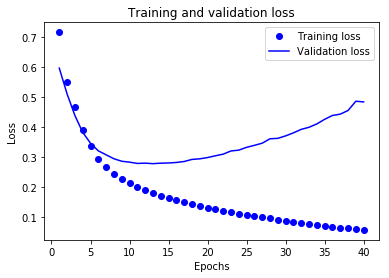

In [75]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

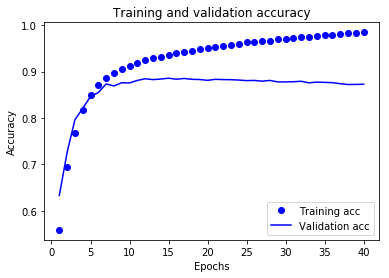

In [76]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()